In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import tensorboard as tb
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Results
This notebook will preset the results of training the OP-Deepdive model on comma2k19 and custom CARLA datasets in the same format. The results are metrics of the evaluation dataset of the last epoch of training. 

In [5]:
def extract_scalars(logdir):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()
    tags = event_acc.Tags()['scalars']
    scalars = {tag: [(s.step, s.value) for s in event_acc.Scalars(tag)] for tag in tags}
    return scalars
opd_comma2k19_adamw = extract_scalars('runs/opd_comma2k19_adamw')

In [9]:
def get_dict_len(dic):
    if isinstance(dic, dict):
        return {k: get_dict_len(v) for k, v in dic.items()}
    elif isinstance(dic, list):
        return len(dic)
    else:
        print("Else", type(dic))
        return len(dic)
get_dict_len(opd_comma2k19_adamw)
    

{'train/epoch': 10000,
 'loss/cls': 10000,
 'loss/reg': 10000,
 'loss/reg_x': 10000,
 'loss/reg_y': 10000,
 'loss/reg_z': 10000,
 'param/lr': 10000,
 'loss/total': 10000,
 'val/AP_0_10_0.5': 100,
 'val/AP_0_10_1': 100,
 'val/AP_0_10_2': 100,
 'val/AP_10_20_0.5': 100,
 'val/AP_10_20_1': 100,
 'val/AP_10_20_2': 100,
 'val/AP_20_30_0.5': 100,
 'val/AP_20_30_1': 100,
 'val/AP_20_30_2': 100,
 'val/AP_30_50_0.5': 100,
 'val/AP_30_50_1': 100,
 'val/AP_30_50_2': 100,
 'val/AP_50_1000_0.5': 100,
 'val/AP_50_1000_1': 100,
 'val/AP_50_1000_2': 100,
 'val/cls_acc': 100,
 'val/eucliden_0_10': 100,
 'val/eucliden_10_20': 100,
 'val/eucliden_20_30': 100,
 'val/eucliden_30_50': 100,
 'val/eucliden_50_1000': 100,
 'val/eucliden_x_0_10': 100,
 'val/eucliden_x_10_20': 100,
 'val/eucliden_x_20_30': 100,
 'val/eucliden_x_30_50': 100,
 'val/eucliden_x_50_1000': 100,
 'val/eucliden_y_0_10': 100,
 'val/eucliden_y_10_20': 100,
 'val/eucliden_y_20_30': 100,
 'val/eucliden_y_30_50': 100,
 'val/eucliden_y_50_1000

In [10]:
dfs_opd_comma2k19_adamw = {k: pd.DataFrame(v, columns=['step', k]) for k, v in opd_comma2k19_adamw.items()}

In [83]:
from typing import Dict

def smooth_df(df: pd.DataFrame, window=10):
    # return df
    return df.rolling(window=window).mean()

def plot_graphs(df_dict: Dict[str, pd.DataFrame], *graphs, avg_per_step:list = list(), rename_plots: Dict[str, str] = dict()):
    graphs = [df_dict[g] for g in graphs]
    step = avg_per_step[0] if len(avg_per_step) > 1 else 1
    ax = smooth_df(graphs[0], window=step).plot(x='step', y=graphs[0].columns[1], label=rename_plots.get(graphs[0].columns[1], graphs[0].columns[1]))
    for i, g in enumerate(graphs[1:], start=1):
        step = avg_per_step[i] if len(avg_per_step) > i else 1
        smooth_df(g, window=step).plot(x='step', y=g.columns[1], ax=ax, label=rename_plots.get(g.columns[1], g.columns[1]))

In [84]:

from typing import Any, Dict, List


def compute_stats(cell: List[float]):
    mean = np.mean(cell)
    std = np.std(cell)
    # Using t-distribution because sample size is small, being < 30
    ci = stats.t.interval(0.95, len(cell)-1, loc=mean, scale=std)
    mean_round = round(mean, 3)
    ci1_round = round(ci[0], 3)
    ci2_round = round(ci[1], 3)
    return f"{mean_round} (CI: [{ci1_round}, {ci2_round}])"

def group_per(dic: Dict[str, Any], groups: List[str]):

    results = {group: dict() for group in groups}
    for group in groups:
        for key, item in dic.items():
            if group in key:
                colname = key.replace(group, "")
                results[group][colname] = item
    return results

In [52]:
dfs_opd_comma2k19_adamw.keys()

dict_keys(['train/epoch', 'loss/cls', 'loss/reg', 'loss/reg_x', 'loss/reg_y', 'loss/reg_z', 'param/lr', 'loss/total', 'val/AP_0_10_0.5', 'val/AP_0_10_1', 'val/AP_0_10_2', 'val/AP_10_20_0.5', 'val/AP_10_20_1', 'val/AP_10_20_2', 'val/AP_20_30_0.5', 'val/AP_20_30_1', 'val/AP_20_30_2', 'val/AP_30_50_0.5', 'val/AP_30_50_1', 'val/AP_30_50_2', 'val/AP_50_1000_0.5', 'val/AP_50_1000_1', 'val/AP_50_1000_2', 'val/cls_acc', 'val/eucliden_0_10', 'val/eucliden_10_20', 'val/eucliden_20_30', 'val/eucliden_30_50', 'val/eucliden_50_1000', 'val/eucliden_x_0_10', 'val/eucliden_x_10_20', 'val/eucliden_x_20_30', 'val/eucliden_x_30_50', 'val/eucliden_x_50_1000', 'val/eucliden_y_0_10', 'val/eucliden_y_10_20', 'val/eucliden_y_20_30', 'val/eucliden_y_30_50', 'val/eucliden_y_50_1000', 'val/l2_dist', 'val/total_loss'])

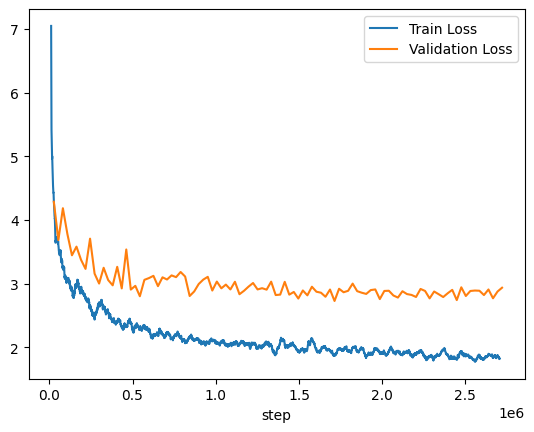

In [85]:
# dfs_opd_comma2k19_adamw["val/total_loss"].plot(x='step', y='val/total_loss', title='OPD Comma2k19 AdamW Loss')
plot_graphs(dfs_opd_comma2k19_adamw, "loss/total", 'val/total_loss', avg_per_step=[100, 1], rename_plots={"loss/total": "Train Loss", "val/total_loss": "Validation Loss"})

In [63]:
dfs_opd_comma2k19_adamw["val/total_loss"][]

,step,val/total_loss
90,2475200,2.941633
91,2502400,2.805128
92,2529600,2.884078
93,2556800,2.890791
94,2584000,2.887805
95,2611200,2.819796
96,2638400,2.907580
97,2665600,2.768993
98,2692800,2.875021
99,2720000,2.935185


In [77]:

def create_table(dfs: Dict[str, pd.DataFrame]):
    columns = ['val/AP_0_10_0.5', 'val/AP_0_10_1', 'val/AP_0_10_2', 'val/AP_10_20_0.5', 'val/AP_10_20_1', 'val/AP_10_20_2', 'val/AP_20_30_0.5', 'val/AP_20_30_1', 'val/AP_20_30_2', 'val/AP_30_50_0.5', 'val/AP_30_50_1', 'val/AP_30_50_2', 'val/AP_50_1000_0.5', 'val/AP_50_1000_1', 'val/AP_50_1000_2', 'val/eucliden_0_10', 'val/eucliden_10_20', 'val/eucliden_20_30', 'val/eucliden_30_50', 'val/eucliden_50_1000', 'val/eucliden_x_0_10', 'val/eucliden_x_10_20', 'val/eucliden_x_20_30', 'val/eucliden_x_30_50', 'val/eucliden_x_50_1000', 'val/eucliden_y_0_10', 'val/eucliden_y_10_20', 'val/eucliden_y_20_30', 'val/eucliden_y_30_50', 'val/eucliden_y_50_1000']
    last_values = {c: round(float(dfs[c][c].iloc[-1]), 3) for c in columns}
    rename_dict = {
        "val/AP_0.5": "AP@0.5",
        "val/AP_1": "AP@1",
        "val/AP_2": "AP@2",
        "val/eucliden": "ED",
        "val/eucliden_x": "ED x",
        "val/eucliden_y": "ED y",
    }
    index = ["0-10", "10-20", "20-30", "30-50", "50+"]
    gruoped = group_per(last_values, ["_0_10", "_10_20", "_20_30", "_30_50", "_50_1000"])
    df = pd.DataFrame.from_dict(gruoped, orient='index').rename(columns=rename_dict)
    df.index = index
    # swithc aps and eds
    return df[[ 'ED', 'ED x', 'ED y','AP@0.5', 'AP@1', 'AP@2']]
    # rename row groups
    
table = create_table(dfs_opd_comma2k19_adamw)
table.to_csv("opd_comma2k19_adamw.csv")

## Comma2k19

In [3]:
# [feb18, florian, may16]

# AP 0-10
ap_0_10_05 = [0.6436, 0.6297, 0.6734] 
ap_0_10_1 = [0.8499, 0.8190, 0.8576]
ap_0_10_2 = [0.9556, 0.9243, 0.9487]

# AP 10-20
ap_10_20_05 = [0.2075, 0.1986, 0.2154]
ap_10_20_1 = [0.4913, 0.4637, 0.4881]
ap_10_20_2 = [0.7680, 0.7327, 0.7620]

# AP 20-30
ap_20_30_05 = [0.08346, 0.04965, 0.07997]
ap_20_30_1 = [0.2668, 0.2455, 0.2693]
ap_20_30_2 = [0.5698, 0.54, 0.5557]

# AP 30-50
ap_30_50_05 = [0.03291, 0.01189, 0.02304]
ap_30_50_1 = [0.1183, 0.08747, 0.119]
ap_30_50_2 = [0.356, 0.3201, 0.3557]

# AP 50+
ap_50_05 = [0.002186, 0.000456, 0.000691]
ap_50_1 = [0.01151, 0.003136, 0.00771]
ap_50_2 = [0.04265, 0.02185, 0.04174]


# Euclidian
euclidian_0_10 = [0.6571, 0.9024, 0.6974]
euclidian_x_0_10 = [0.643, 0.8872, 0.6791]
euclidian_y_0_10 = [0.05289, 0.05678, 0.06512]

euclidian_10_20 = [1.911, 2.3, 1.916]
euclidian_x_10_20 = [1.81, 2.207, 1.815]
euclidian_y_10_20 = [0.2751, 0.2579, 0.273]

euclidian_20_30 = [3.106, 3.642, 3.137]
euclidian_x_20_30 = [2.917, 3.463, 2.956]
euclidian_y_20_30 = [0.4867, 0.4738, 0.4698]

euclidian_30_50 = [4.9, 5.729, 4.912]
euclidian_x_30_50 = [4.569, 5.382, 4.591]
euclidian_y_30_50 = [0.8395, 0.8965, 0.8123]

euclidian_50 = [19.06, 24.5, 18.79]
euclidian_x_50 = [14.6, 20.63, 14.25]
euclidian_y_50 = [0.8395, 0.8965, 0.8123]
# Euclidian x

# Euclidian y



In [4]:
comma2k19_results = {
    "ap_0_10_05": [0.6436, 0.6297, 0.6734],
    "ap_0_10_1": [0.8499, 0.8190, 0.8576],
    "ap_0_10_2": [0.9556, 0.9243, 0.9487],
    "ap_10_20_05": [0.2075, 0.1986, 0.2154],
    "ap_10_20_1": [0.4913, 0.4637, 0.4881],
    "ap_10_20_2": [0.7680, 0.7327, 0.7620],
    "ap_20_30_05": [0.08346, 0.04965, 0.07997],
    "ap_20_30_1": [0.2668, 0.2455, 0.2693],
    "ap_20_30_2": [0.5698, 0.54, 0.5557],
    "ap_30_50_05": [0.03291, 0.01189, 0.02304],
    "ap_30_50_1": [0.1183, 0.08747, 0.119],
    "ap_30_50_2": [0.356, 0.3201, 0.3557],
    "ap_50p_05": [0.002186, 0.000456, 0.000691],
    "ap_50p_1": [0.01151, 0.003136, 0.00771],
    "ap_50p_2": [0.04265, 0.02185, 0.04174],
    "euclidian_0_10": [0.6571, 0.9024, 0.6974],
    "euclidian_x_0_10": [0.643, 0.8872, 0.6791],
    "euclidian_y_0_10": [0.05289, 0.05678, 0.06512],
    "euclidian_10_20": [1.911, 2.3, 1.916],
    "euclidian_x_10_20": [1.81, 2.207, 1.815],
    "euclidian_y_10_20": [0.2751, 0.2579, 0.273],
    "euclidian_20_30": [3.106, 3.642, 3.137],
    "euclidian_x_20_30": [2.917, 3.463, 2.956],
    "euclidian_y_20_30": [0.4867, 0.4738, 0.4698],
    "euclidian_30_50": [4.9, 5.729, 4.912],
    "euclidian_x_30_50": [4.569, 5.382, 4.591],
    "euclidian_y_30_50": [0.8395, 0.8965, 0.8123],
    "euclidian_50p": [19.06, 24.5, 18.79],
    "euclidian_x_50p": [14.6, 20.63, 14.25],
    "euclidian_y_50p": [0.8395, 0.8965, 0.8123]
}
comma2k19_results.keys().__len__()

30

In [ ]:

comma2k19_adamw_results = {
    "ap_0_10_05": [0.6436, 0.6297, 0.6734],
    "ap_0_10_1": [0.8499, 0.8190, 0.8576],
    "ap_0_10_2": [0.9556, 0.9243, 0.9487],
    "ap_10_20_05": [0.2075, 0.1986, 0.2154],
    "ap_10_20_1": [0.4913, 0.4637, 0.4881],
    "ap_10_20_2": [0.7680, 0.7327, 0.7620],
    "ap_20_30_05": [0.08346, 0.04965, 0.07997],
    "ap_20_30_1": [0.2668, 0.2455, 0.2693],
    "ap_20_30_2": [0.5698, 0.54, 0.5557],
    "ap_30_50_05": [0.03291, 0.01189, 0.02304],
    "ap_30_50_1": [0.1183, 0.08747, 0.119],
    "ap_30_50_2": [0.356, 0.3201, 0.3557],
    "ap_50p_05": [0.002186, 0.000456, 0.000691],
    "ap_50p_1": [0.01151, 0.003136, 0.00771],
    "ap_50p_2": [0.04265, 0.02185, 0.04174],
    "euclidian_0_10": [0.6571, 0.9024, 0.6974],
    "euclidian_x_0_10": [0.643, 0.8872, 0.6791],
    "euclidian_y_0_10": [0.05289, 0.05678, 0.06512],
    "euclidian_10_20": [1.911, 2.3, 1.916],
    "euclidian_x_10_20": [1.81, 2.207, 1.815],
    "euclidian_y_10_20": [0.2751, 0.2579, 0.273],
    "euclidian_20_30": [3.106, 3.642, 3.137],
    "euclidian_x_20_30": [2.917, 3.463, 2.956],
    "euclidian_y_20_30": [0.4867, 0.4738, 0.4698],
    "euclidian_30_50": [4.9, 5.729, 4.912],
    "euclidian_x_30_50": [4.569, 5.382, 4.591],
    "euclidian_y_30_50": [0.8395, 0.8965, 0.8123],
    "euclidian_50p": [19.06, 24.5, 18.79],
    "euclidian_x_50p": [14.6, 20.63, 14.25],
    "euclidian_y_50p": [0.8395, 0.8965, 0.8123]
}
comma2k19_results.keys().__len__()

In [5]:
# CARLA 1 (all Towns), CARLA 2 (only Town04 and Town06)
# feb25, may09
carla_results = {
    "ap_0_10_05": [0.3392, 0.3516],
    "ap_0_10_1": [0.5157, 0.5124],
    "ap_0_10_2": [0.7225, 0.7376],
    "ap_10_20_05": [0.0387, 0.02483],
    "ap_10_20_1": [0.08629, 0.05404],
    "ap_10_20_2": [0.1833, 0.1226],
    "ap_20_30_05": [0.02125, 0.01245],
    "ap_20_30_1": [0.04853, 0.02728],
    "ap_20_30_2": [0.1066, 0.06406],
    "ap_30_50_05": [0.01408, 0.007316],
    "ap_30_50_1": [0.03369, 0.0158],
    "ap_30_50_2": [0.07324, 0.03613],
    "ap_50p_05": [0.004614, 0.003209],
    "ap_50p_1": [0.01515, 0.006798],
    "ap_50p_2": [0.03512, 0.0146],
    "euclidian_0_10": [2.541, 2.009],
    "euclidian_x_0_10": [2.281, 1.915],
    "euclidian_y_0_10": [0.479, 0.1826],
    "euclidian_10_20": [9.043, 8.883],
    "euclidian_x_10_20": [7.214, 8.412],
    "euclidian_y_10_20": [3.079, 0.9382],
    "euclidian_20_30": [12.18, 14.72],
    "euclidian_x_20_30": [10.34, 14.11],
    "euclidian_y_20_30": [3.507, 1.583],
    "euclidian_30_50": [17.95, 23.69],
    "euclidian_x_30_50": [15.76, 22.52],
    "euclidian_y_30_50": [4.641, 3.357],
    "euclidian_50p": [34.04, 56.54],
    "euclidian_x_50p": [27.93, 52.72],
    "euclidian_y_50p": [11.77, 12.69]
}

In [6]:
# 

In [7]:
groups = ["0_10", "10_20", "20_30", "30_50", "50p"]
index = ["0-10", "10-20", "20-30", "30-50", "50+"]
columns = ["AP@0.5", "AP@1", "AP@2", "ED", "ED x", "ED y"]

In [8]:
aps = ["AP@0.5", "AP@1", "AP@2"]
eds = ["ED", "ED x", "ED y"]

In [9]:
comma2k19_agg = {key: compute_stats(value) for key, value in comma2k19_results.items()}
comm = group_per(comma2k19_agg, groups)
print(comm)
comma2k19_df = pd.DataFrame.from_dict(comm, orient="index")
comma2k19_df.index = index
comma2k19_df.columns = columns
comma2k19_df

{'0_10': {'ap__05': '0.649 (CI: [0.57, 0.727])', 'ap__1': '0.842 (CI: [0.77, 0.914])', 'ap__2': '0.943 (CI: [0.885, 1.001])', 'euclidian_': '0.752 (CI: [0.29, 1.214])', 'euclidian_x_': '0.736 (CI: [0.273, 1.199])', 'euclidian_y_': '0.058 (CI: [0.036, 0.08])'}, '10_20': {'ap__05': '0.207 (CI: [0.178, 0.237])', 'ap__1': '0.481 (CI: [0.428, 0.534])', 'ap__2': '0.754 (CI: [0.688, 0.821])', 'euclidian_': '2.042 (CI: [1.258, 2.826])', 'euclidian_x_': '1.944 (CI: [1.144, 2.744])', 'euclidian_y_': '0.269 (CI: [0.236, 0.302])'}, '20_30': {'ap__05': '0.071 (CI: [0.006, 0.136])', 'ap__1': '0.261 (CI: [0.215, 0.306])', 'ap__2': '0.555 (CI: [0.503, 0.608])', 'euclidian_': '3.295 (CI: [2.238, 4.352])', 'euclidian_x_': '3.112 (CI: [2.042, 4.182])', 'euclidian_y_': '0.477 (CI: [0.446, 0.508])'}, '30_50': {'ap__05': '0.023 (CI: [-0.014, 0.06])', 'ap__1': '0.108 (CI: [0.045, 0.172])', 'ap__2': '0.344 (CI: [0.271, 0.416])', 'euclidian_': '5.18 (CI: [3.511, 6.85])', 'euclidian_x_': '4.847 (CI: [3.22, 6.47

,AP@0.5,AP@1,AP@2,ED,ED x,ED y
0-10,"0.649 (CI: [0.57, 0.727])","0.842 (CI: [0.77, 0.914])","0.943 (CI: [0.885, 1.001])","0.752 (CI: [0.29, 1.214])","0.736 (CI: [0.273, 1.199])","0.058 (CI: [0.036, 0.08])"
10-20,"0.207 (CI: [0.178, 0.237])","0.481 (CI: [0.428, 0.534])","0.754 (CI: [0.688, 0.821])","2.042 (CI: [1.258, 2.826])","1.944 (CI: [1.144, 2.744])","0.269 (CI: [0.236, 0.302])"
20-30,"0.071 (CI: [0.006, 0.136])","0.261 (CI: [0.215, 0.306])","0.555 (CI: [0.503, 0.608])","3.295 (CI: [2.238, 4.352])","3.112 (CI: [2.042, 4.182])","0.477 (CI: [0.446, 0.508])"
30-50,"0.023 (CI: [-0.014, 0.06])","0.108 (CI: [0.045, 0.172])","0.344 (CI: [0.271, 0.416])","5.18 (CI: [3.511, 6.85])","4.847 (CI: [3.22, 6.474])","0.849 (CI: [0.698, 1.0])"
50+,"0.001 (CI: [-0.002, 0.004])","0.007 (CI: [-0.007, 0.022])","0.035 (CI: [-0.006, 0.077])","20.783 (CI: [9.466, 32.101])","16.493 (CI: [3.893, 29.094])","0.849 (CI: [0.698, 1.0])"


In [10]:
names = ["feb18", "florian", "may16"]
for i in range(3):
    comma = {key: round(value[i], 3) for key, value in comma2k19_results.items()}
    comma_grouped = group_per(comma, groups)
    comma_df = pd.DataFrame.from_dict(comma_grouped, orient="index")
    comma_df.index = index
    comma_df.columns = columns
    comma_df[eds + aps].to_csv(f"comma2k19_{names[i]}.csv")

In [11]:
comma2k19_ap = comma2k19_df[["AP@0.5", "AP@1", "AP@2"]]
comma2k19_ed = comma2k19_df[["ED", "ED x", "ED y"]]

In [12]:
from datetime import datetime


# thistime = datetime.now().strftime("%m%d%H%M")
comma2k19_ap.to_csv(f"comma2k19_ap.csv")
comma2k19_ed.to_csv(f"comma2k19_ed.csv")

In [13]:
carla1 = {key: value[0] for key, value in carla_results.items()}
carla1_grouped = group_per(carla1, groups)
carla2 = {key: value[1] for key, value in carla_results.items()}
carla2_grouped = group_per(carla2, groups)

carla1_df = pd.DataFrame.from_dict(carla1_grouped, orient="index", )
carla1_df.index = index
carla1_df.columns = columns
carla2_df = pd.DataFrame.from_dict(carla2_grouped, orient="index")
carla2_df.index = index
carla2_df.columns = columns

In [14]:
carla1_df[eds + aps].to_csv(f"carla1.csv")
carla2_df[eds + aps].to_csv(f"carla2.csv")

In [15]:
carla1_df[aps].to_csv(f"carla1_ap.csv")
carla1_df[eds].to_csv(f"carla1_ed.csv")

In [16]:
carla2_df[aps].to_csv(f"carla2_ap.csv")
carla2_df[eds].to_csv(f"carla2_ed.csv")